<h3> ARCTIC data reduction from 10/23 trip

Start with usual setup

In [2]:
from pyvista import tv,imred,stars
import numpy as np
import matplotlib.pyplot as plt
import importlib
import matplotlib
from astropy.table import Table, vstack
%matplotlib qt

Instantiate a Reducer. Since the setup file is for 2x2, change the scale manually. (Note for bias subtraction to work correctly in 4x4, need to use overscan regions as specified in the headers; new version of Reducer allows for this.)

In [3]:
red=imred.Reducer('ARCTIC',conf='quad',dir='/home/holtz/raw/apo/oct23/UT231023/arctic')
red.scale=0.44
red.headerbox
red.normbox[0].set(550,750,550,750)
red.normbox[0].show()

INSTRUMENT: ARCTIC   config: quad
  will use format:  /home/holtz/raw/apo/oct23/UT231023/arctic/*{:04d}.f*.fits*
         gain:  [2.0]    rn: [ 3.7]
         scale:  0.228   
  Biastype : 1
  Bias box: 
    SC    NC    SR    NR
  1026    26    20   981 
  1026    26  1050   979 
  1052    24    20   981 
  1052    24  1050   979 
  Trim box: 
    SC    NC    SR    NR
     2  1024     0  1024 
     2  1024  1026  1024 
  1076  1024     0  1024 
  1076  1024  1026  1024 
  Norm box: 
    SC    NC    SR    NR
   800   201   800   201 
    SC    NC    SR    NR
   550   201   550   201 


Get the image log from headers. This is useful to have to search through to find images, e.g. through a particular filter, etc.

In [4]:
log=red.log()
log.pprint_all()

       FILE                DATE-OBS           OBJNAME       RA         DEC      FILTER  EXPTIME
----------------- -------------------------- --------- ----------- ----------- -------- -------
    cal.0001.fits 2023-10-22T23:58:11.679580            6:56:00.00 75:00:00.00     CUVR       0
    cal.0002.fits 2023-10-23T00:00:29.811612           10:00:00.00 83:00:00.00     CUVR       0
    cal.0003.fits 2023-10-23T00:03:56.789339            5:00:00.00 10:00:00.00     CUVR       0
    cal.0004.fits 2023-10-23T00:15:14.384060            6:56:00.00 60:00:00.00 SDSS r#1     1.5
    cal.0005.fits 2023-10-23T00:16:50.980140            6:56:00.00 60:00:00.00 SDSS r#1     1.5
    cal.0006.fits 2023-10-23T00:16:55.871686            6:56:00.00 60:00:00.00 SDSS r#1     1.5
    cal.0007.fits 2023-10-23T00:17:00.850195            6:56:00.00 60:00:00.00 SDSS r#1     1.5
    cal.0008.fits 2023-10-23T00:17:05.849406            6:56:00.00 60:00:00.00 SDSS r#1     1.5
    cal.0009.fits 2023-10-23T00:17:10.82

Get the filter names from the headers

In [7]:
set(log['FILTER'])

{'CUVR', 'SDSS g#2', 'SDSS i', 'SDSS r#1', 'SDSS u', 'SDSS z'}

Specifiy the image numbers of the twilight flats in each filter. Set correspondence of simple filter names to header filter names.

In [8]:
twiframes=[]
twiframes.append(range(34,41+1))  #u
twiframes.append(range(65,70+1))  # g
twiframes.append(range(71,76+1))  # r
twiframes.append(range(77,86+1))  # i
twiframes.append(range(42,64+1)) #z
bias=np.arange(87,97+1)
filts=['u','g','r','i','z']
filtnames=['SDSS u','SDSS g#2','SDSS r#1','SDSS i','SDSS z']

Create the flats for each filter, and load into a flat dictionary. Inspect each componentm and modify twilight flat list as needed to remove bad frames.

In [9]:
t=tv.TV()

libGL error: No matching fbConfigs or visuals found
libGL error: failed to load driver: swrast


In [10]:
flat={}
for filt,frames in zip(filts[2:3],twiframes[2:3]) :
    flat[filt] = red.mkflat(frames,display=t)

  Reading file: /home/holtz/raw/apo/oct23/UT231023/arctic/cal.0071.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231023/arctic/cal.0072.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231023/arctic/cal.0073.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231023/arctic/cal.0074.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231023/arctic/cal.0075.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /hom

In [8]:
t.tv(flat['r'])

Get the positions and magnitudes of standard stars

In [11]:
tab=Table.read('ugriz_smith.fits')
#table formatting
for col in ['u','g','r','i','z'] : tab[col].info.format='.2f'
for col in ['RA','DEC'] : tab[col].info.format='.6f'
tab


<Table length=158>
    NAME        RA        DEC        u       g       r       i       z      ID 
  bytes11    float64    float64   float64 float64 float64 float64 float64 int64
----------- ---------- ---------- ------- ------- ------- ------- ------- -----
    Hilt 31   7.046458  64.131056   12.58   11.58   11.00   10.70   10.55     1
  G 158-100   8.477500 -12.133028   16.30   15.20   14.69   14.47   14.38     2
 BD+71 0031  10.934750  72.178639   11.25   10.35   10.09   10.01   10.00     3
  SA 92 342  13.791250   0.720250   12.85   11.78   11.53   11.48   11.49     4
  SA 92 263  13.914208   0.605556   14.50   12.27   11.47   11.16   10.99     5
  SA 92 502  14.033875   1.073639   13.03   12.00   11.71   11.63   11.62     6
  SA 92 282  14.195250   0.641917   14.07   13.07   12.94   12.91   12.92     7
  SA 92 288  14.320833   0.613528   13.78   12.01   11.35   11.12   11.02     8
  SA 93 317  28.657208   0.716806   12.82   11.75   11.44   11.35   11.35     9
  SA 93 333  28.771750   0.761806   14.14   12.39   11.76   11.56   11.47    10
  SA 93 424  28.859792   0.945139   14.53   12.12   11.30   11.02   10.90    11
   Hilt 190  29.600292  61.895417   12.43   11.52   10.88   10.56   10.34    12
   LHS 0014  33.087458   3.575667   13.39   10.76    9.48    8.55    8.10    13
   Hilt 233  33.124875  59.901139   12.63   11.49   10.66   10.21    9.92    14
        ...        ...        ...     ...     ...     ...     ...     ...   ...
 BD+17 4708 332.880708  18.092806   10.56    9.64    9.35    9.25    9.23   144
 BD-11 5781 333.294500 -11.177333   11.86    9.90    9.18    8.94    8.81   145
 SA 114 531 340.153250   0.865444   13.84   12.42   11.88   11.69   11.61   146
 SA 114 654 340.358917   1.169639   13.52   12.12   11.67   11.54   11.50   147
 SA 114 656 340.396083   1.186056   15.04   13.08   12.33   12.03   11.88   148
 SA 114 548 340.403458   0.984917   15.40   12.25   11.13   10.69   10.44   149
 SA 114 750 340.436250   1.210056   12.36   11.81   12.02   12.25   12.41   150
    G 27-45 341.234583  -2.353556   12.90   11.79   11.28   11.09   11.01   151
   Ross 786 347.388917   0.717250   11.47   10.25    9.71    9.48    9.39   152
     GD 246 348.096125  10.784500   12.35   12.84   13.35   13.72   14.09   153
 BD+38 4955 348.411708  39.417389   12.35   11.32   10.80   10.58   10.48   154
 BD+33 4737 353.650542  34.039500   11.06    9.41    8.84    8.66    8.60   155
PG2336+004B 354.659417   0.712889   13.75   12.65   12.31   12.21   12.20   156
 SA 115 420 355.652000   1.099667   12.44   11.35   11.06   10.98   10.98   157
 SA 115 516 356.064083   1.236806   13.08   10.91   10.11    9.79    9.62   158

Define a function to read/reduce a frame, solve for WCS, find standard stars on frame, recenter, and do photometry

In [28]:
import os
def dophot(im,tab_phot, display, inter=False) :

    # populate x and y columns with pixel locations in this image
    tab['x'],tab['y']=im.wcs.wcs_world2pix(tab['RA'],tab['DEC'],0)

    nrow,ncol=im.data.shape
    gd=np.where((tab['x']>0)&(tab['y']>0)&(tab['x']<ncol)&(tab['y']<nrow))[0]
    if display is not None :
        display.tvclear()
        display.tv(im)
        for xx,yy in zip(tab[gd]['x'],tab[gd]['y']) : 
            display.tvcirc(xx,yy,20)

    phot=stars.mark(t,tab[gd],rad=3/red.scale,auto=True,exit=True)
    stars.photom(im,phot,rad=[10],skyrad=[20,30],display=display)
    tab_phot=vstack([tab_phot,phot])
    
    if inter : 
        phot.pprint()
        display.imexam()
        
    return tab_phot

Demo reduction of a single image, showing overscan subtraction, flat fielding, and plate solving

In [13]:
im=red.reduce(114,flat=flat['r'],solve=True,display=t)

  Reading file: /home/holtz/raw/apo/oct23/UT231023/arctic/science.0114.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  See bias box (solid outlines applied to dashed regions of the same color), and cross section. 
   To continue, hit space in display window (p for debug) 
  flat fielding...
  See flat-fielded image and original with - (minus) key.
   To continue, hit space in display window (p for debug) 
INFO: array provided for uncertainty; assuming it is a StdDevUncertainty. [astropy.nddata.ccddata]
  plate solving with local astrometry.net....
found  39  objects 
/usr/local/astrometry/bin/solve-field --scale-units arcsecperpix --scale-low 0.396000 --scale-high 0.484000 -X xcentroid -Y ycentroid -w 4800 -e 3000 --overwrite --ra 340.400000 --dec 1.183333 --radius 3 tmp8kez8u84xy.fits
Reading input file 1 of 1: "tmp8kez8u84xy.fits"...


/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.4mTckR -i ./tmp8kez8u84xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmp8kez8u84xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmp8kez8u84xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmp8kez8u84xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (340.4,1.18333)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4206-04.fits, field objects 1-10).
Field 1 did not solve (index index-4205-04.fits, field objects 1-10).
Field 1 did not solve (index index-4204-17.fits, field objects 1-10

Show the derived WCS header cards

In [14]:
im.wcs.to_header(relax=True)

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =         260.05594212 / Pixel coordinate of reference point            
CRPIX2  =        715.468698974 / Pixel coordinate of reference point            
PC1_1   =   -0.000127366744027 / Coordinate transformation matrix element       
PC1_2   =    2.77366245184E-07 / Coordinate transformation matrix element       
PC2_1   =    -5.0890778923E-07 / Coordinate transformation matrix element       
PC2_2   =    0.000127026810102 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN-SIP'       / TAN (gnomonic) projection + SIP distortions    
CTYPE2  = 'DEC--TAN-SIP'    

Demo identification of standards and aperture photometry on one image

In [29]:
tab_phot=[]
dophot(im,tab_phot,t,inter=True) 

   NAME        RA       DEC      u     g     r     i     z    ID ... EXPTIME  FILTER  AIRMASS     MJD       aper10 aper10err  sky  skysig   peak 
---------- ---------- -------- ----- ----- ----- ----- ----- --- ... ------- -------- ------- ------------ ------- --------- ----- ------ -------
SA 114 654 340.358917 1.169639 13.52 12.12 11.67 11.54 11.50 147 ...     0.5 SDSS r#1   1.173 60240.148217 -13.352     0.002 30.54   4.61 50631.9
SA 114 656 340.396083 1.186056 15.04 13.08 12.33 12.03 11.88 148 ...     0.5 SDSS r#1   1.173 60240.148217 -12.680     0.002 29.93   4.47 24872.5
SA 114 750 340.436250 1.210056 12.36 11.81 12.02 12.25 12.41 150 ...     0.5 SDSS r#1   1.173 60240.148217 -12.961     0.002 30.28   4.56 31863.4
Hit key near star center, "q" to quit


<Table length=3>
  col0     NAME        RA       DEC       u       g       r       i    ...  FILTER  AIRMASS     MJD       aper10 aper10err   sky    skysig   peak 
float64  bytes11    float64   float64  float64 float64 float64 float64 ...   str8   float64   float64    float64  float64  float64 float64 float64
------- ---------- ---------- -------- ------- ------- ------- ------- ... -------- ------- ------------ ------- --------- ------- ------- -------
     -- SA 114 654 340.358917 1.169639   13.52   12.12   11.67   11.54 ... SDSS r#1   1.173 60240.148217 -13.352     0.002   30.54    4.61 50631.9
     -- SA 114 656 340.396083 1.186056   15.04   13.08   12.33   12.03 ... SDSS r#1   1.173 60240.148217 -12.680     0.002   29.93    4.47 24872.5
     -- SA 114 750 340.436250 1.210056   12.36   11.81   12.02   12.25 ... SDSS r#1   1.173 60240.148217 -12.961     0.002   30.28    4.56 31863.4

<h4>Bias creation and subtraction

In [15]:
old_dir=red.dir
red.dir='/home/holtz/raw/apo/oct23/UT231102'
bias1=red.mkbias(range(1,16),display=t)
bias2=red.mkbias(range(47,62))
red.dir=old_dir

  Reading file: /home/holtz/raw/apo/oct23/UT231102/bias4x4.0001.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231102/bias4x4.0002.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231102/bias4x4.0003.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231102/bias4x4.0004.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231102/bias4x4.0005.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo

In [18]:
im=red.reduce(114,bias=bias1,flat=flat['r'],solve=True,display=t) 

  Reading file: /home/holtz/raw/apo/oct23/UT231023/arctic/science.0114.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  See bias box (solid outlines applied to dashed regions of the same color), and cross section. 
   To continue, hit space in display window (p for debug) 
  subtracting bias...
  flat fielding...
  See flat-fielded image and original with - (minus) key.
   To continue, hit space in display window (p for debug) 
INFO: array provided for uncertainty; assuming it is a StdDevUncertainty. [astropy.nddata.ccddata]
  plate solving with local astrometry.net....
found  47  objects 
/usr/local/astrometry/bin/solve-field --scale-units arcsecperpix --scale-low 0.396000 --scale-high 0.484000 -X xcentroid -Y ycentroid -w 4800 -e 3000 --overwrite --ra 340.400000 --dec 1.183333 --radius 3 tmptusrrvktxy.fits
Reading input file 1 of 1: "tmptusrrvktxy.fits"...


/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.HWrvr8 -i ./tmptusrrvktxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmptusrrvktxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmptusrrvktxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmptusrrvktxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (340.4,1.18333)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4206-04.fits, field objects 1-10).
Field 1 did not solve (index index-4205-04.fits, field objects 1-10).
Field 1 did not solve (index index-4204-17.fits, field objects 1-10

Now run it for all of the frames of a given filter! Will take a little while with the plate solving. Note you could modify the for loop to do every nth frame for a quick test, etc....

In [14]:
tab_phot=[]             # initialize final photometry table, the table for each image will be appended to this
matplotlib.use('Agg')   # this will turn off display
t=tv.TV()
for filt,filtname in zip(filts[2:3],filtnames[2:3]) :
    frames=np.where((log['FILTER'] == filtname) & (np.char.find(log['FILE'],b'science') >=0) )[0]
    print(filt,filtname,frames)
    for frame in frames :
        try :
            file = log['FILE'][frame]
            im=red.reduce(log['FILE'][frame],flat=flat[filt],solve=True)
            try: os.mkdir(red.dir+'/red')
            except : pass
            im.write(red.dir+'/red/{:s}'.format(file))

            tab_phot = dophot(im,tab_phot,t)
        except : 
            continue

r SDSS r#1 [110 111 112 113 133 134 135 148 149 150 163 173 174 175 188 189 190 209
 210 211 225 226 227 242 243 244]
  Reading file: /home/holtz/raw/apo/oct23/UT231023/arctic/science.0111.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  flat fielding...
INFO: array provided for uncertainty; assuming it is a StdDevUncertainty. [astropy.nddata.ccddata]
  plate solving with local astrometry.net....
found  44  objects 
/usr/local/astrometry/bin/solve-field --scale-units arcsecperpix --scale-low 0.396000 --scale-high 0.484000 -X xcentroid -Y ycentroid -w 4800 -e 3000 --overwrite --ra 340.400000 --dec 1.183333 --radius 3 tmphh2lyhwhxy.fits
Reading input file 1 of 1: "tmphh2lyhwhxy.fits"...


/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.cs3t5i -i ./tmphh2lyhwhxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmphh2lyhwhxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmphh2lyhwhxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmphh2lyhwhxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (340.4,1.18333)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4206-04.fits, field objects 1-10).
Field 1 did not solve (index index-4205-04.fits, field objects 1-10).
Field 1 did not solve (index index-4204-17.fits, field objects 1-10

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.VuFH9d -i ./tmpc42t258_xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpc42t258_xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpc42t258_xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpc42t258_xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (340.4,1.18333)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4206-04.fits, field objects 1-10).
Field 1 did not solve (index index-4205-04.fits, field objects 1-10).
Field 1 did not solve (index index-4204-17.fits, field objects 1-10

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.x4wBKv -i ./tmpco_of_1xxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpco_of_1xxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpco_of_1xxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpco_of_1xxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (340.4,1.18333)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4206-04.fits, field objects 1-10).
Field 1 did not solve (index index-4205-04.fits, field objects 1-10).
Field 1 did not solve (index index-4204-17.fits, field objects 1-10

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.1Qaacr -i ./tmp9gnppa0cxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmp9gnppa0cxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmp9gnppa0cxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmp9gnppa0cxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (340.4,1.18333)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4206-04.fits, field objects 1-10).
Field 1 did not solve (index index-4205-04.fits, field objects 1-10).
Field 1 did not solve (index index-4204-17.fits, field objects 1-10

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.QPsuLn -i ./tmp459tl9b9xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmp459tl9b9xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmp459tl9b9xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmp459tl9b9xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (44.3917,0.3)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-08.fits, field objects 1-10).
Field 1 did not solve (index index-4207-05.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4207-00.fits, field objects 1-10).

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.PIJzuB -i ./tmp3sx6at96xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmp3sx6at96xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmp3sx6at96xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmp3sx6at96xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (44.3917,0.3)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-08.fits, field objects 1-10).
Field 1 did not solve (index index-4207-05.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4207-00.fits, field objects 1-10).

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.CroMTA -i ./tmpskj036bmxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpskj036bmxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpskj036bmxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpskj036bmxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (44.3917,0.3)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-08.fits, field objects 1-10).
Field 1 did not solve (index index-4207-05.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4207-00.fits, field objects 1-10).

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.jZy2GZ -i ./tmpfpp7ohumxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpfpp7ohumxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpfpp7ohumxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpfpp7ohumxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (44.3917,0.3)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-08.fits, field objects 1-10).
Field 1 did not solve (index index-4207-05.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4207-00.fits, field objects 1-10).

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.9TYxGv -i ./tmpcmn4prr3xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpcmn4prr3xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpcmn4prr3xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpcmn4prr3xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (44.3917,0.3)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-08.fits, field objects 1-10).
Field 1 did not solve (index index-4207-05.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4207-00.fits, field objects 1-10).

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.s5a5Dn -i ./tmpnlk6qmiwxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpnlk6qmiwxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpnlk6qmiwxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpnlk6qmiwxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (44.3917,0.3)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-08.fits, field objects 1-10).
Field 1 did not solve (index index-4207-05.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4207-00.fits, field objects 1-10).

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.QOPzmz -i ./tmph0ze00klxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmph0ze00klxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmph0ze00klxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmph0ze00klxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (310.721,0.254167)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-11.fits, field objects 1-10).
Field 1 did not solve (index index-4207-07.fits, field objects 1-10).
Field 1 did not solve (index index-4207-03.fits, field objects 1-10).
Field 1 did not solve (index index-4206-11.fits, field objects 1

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.9xSCaf -i ./tmpetbm6kp9xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpetbm6kp9xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpetbm6kp9xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpetbm6kp9xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (310.721,0.254167)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-11.fits, field objects 1-10).
Field 1 did not solve (index index-4207-07.fits, field objects 1-10).
Field 1 did not solve (index index-4207-03.fits, field objects 1-10).
Field 1 did not solve (index index-4206-11.fits, field objects 1

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.I7W8ZU -i ./tmpiu6ne_75xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpiu6ne_75xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpiu6ne_75xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpiu6ne_75xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (310.721,0.254167)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-11.fits, field objects 1-10).
Field 1 did not solve (index index-4207-07.fits, field objects 1-10).
Field 1 did not solve (index index-4207-03.fits, field objects 1-10).
Field 1 did not solve (index index-4206-11.fits, field objects 1

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.sDXRF3 -i ./tmprrbousx9xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmprrbousx9xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmprrbousx9xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmprrbousx9xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (310.721,0.254167)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-11.fits, field objects 1-10).
Field 1 did not solve (index index-4207-07.fits, field objects 1-10).
Field 1 did not solve (index index-4207-03.fits, field objects 1-10).
Field 1 did not solve (index index-4206-11.fits, field objects 1

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.Xcmvat -i ./tmpad9ey_mexy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpad9ey_mexy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpad9ey_mexy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpad9ey_mexy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (310.721,0.254167)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-11.fits, field objects 1-10).
Field 1 did not solve (index index-4207-07.fits, field objects 1-10).
Field 1 did not solve (index index-4207-03.fits, field objects 1-10).
Field 1 did not solve (index index-4206-11.fits, field objects 1

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.GhqIlc -i ./tmpl0uitgl0xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpl0uitgl0xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpl0uitgl0xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpl0uitgl0xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (310.721,0.254167)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-11.fits, field objects 1-10).
Field 1 did not solve (index index-4207-07.fits, field objects 1-10).
Field 1 did not solve (index index-4207-03.fits, field objects 1-10).
Field 1 did not solve (index index-4206-11.fits, field objects 1

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.2xFX5d -i ./tmpt_wqbit3xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpt_wqbit3xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpt_wqbit3xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpt_wqbit3xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (310.721,0.254167)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-11.fits, field objects 1-10).
Field 1 did not solve (index index-4207-07.fits, field objects 1-10).
Field 1 did not solve (index index-4207-03.fits, field objects 1-10).
Field 1 did not solve (index index-4206-11.fits, field objects 1

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.Q8A50B -i ./tmpmy75a2coxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpmy75a2coxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpmy75a2coxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpmy75a2coxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (340.392,1.19167)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4206-04.fits, field objects 1-10).
Field 1 did not solve (index index-4205-04.fits, field objects 1-10).
Field 1 did not solve (index index-4204-17.fits, field objects 1-

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.pOKlz6 -i ./tmphh9gje62xy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmphh9gje62xy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmphh9gje62xy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmphh9gje62xy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (340.392,1.19167)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4206-04.fits, field objects 1-10).
Field 1 did not solve (index index-4205-04.fits, field objects 1-10).
Field 1 did not solve (index index-4204-17.fits, field objects 1-

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.rVOxvf -i ./tmpuc5cwrwlxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpuc5cwrwlxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpuc5cwrwlxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpuc5cwrwlxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (340.392,1.19167)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4206-04.fits, field objects 1-10).
Field 1 did not solve (index index-4205-04.fits, field objects 1-10).
Field 1 did not solve (index index-4204-17.fits, field objects 1-

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.YL8qqX -i ./tmpjt3mwlrzxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpjt3mwlrzxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpjt3mwlrzxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpjt3mwlrzxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (44.3917,0.3)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-08.fits, field objects 1-10).
Field 1 did not solve (index index-4207-05.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4207-00.fits, field objects 1-10).

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.P2sEw9 -i ./tmpl0eyo92lxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpl0eyo92lxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpl0eyo92lxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpl0eyo92lxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (44.3917,0.3)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-08.fits, field objects 1-10).
Field 1 did not solve (index index-4207-05.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4207-00.fits, field objects 1-10).

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.LkxBj0 -i ./tmpkhmtaf7rxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpkhmtaf7rxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpkhmtaf7rxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpkhmtaf7rxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (44.3917,0.3)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-08.fits, field objects 1-10).
Field 1 did not solve (index index-4207-05.fits, field objects 1-10).
Field 1 did not solve (index index-4207-04.fits, field objects 1-10).
Field 1 did not solve (index index-4207-00.fits, field objects 1-10).

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.Y52dTf -i ./tmpk43dnv3hxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmpk43dnv3hxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmpk43dnv3hxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmpk43dnv3hxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (310.717,0.258333)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-11.fits, field objects 1-10).
Field 1 did not solve (index index-4207-07.fits, field objects 1-10).
Field 1 did not solve (index index-4207-03.fits, field objects 1-10).
Field 1 did not solve (index index-4206-11.fits, field objects 1

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.GgqC7Q -i ./tmp0cmccqylxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmp0cmccqylxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmp0cmccqylxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmp0cmccqylxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (310.717,0.258333)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-11.fits, field objects 1-10).
Field 1 did not solve (index index-4207-07.fits, field objects 1-10).
Field 1 did not solve (index index-4207-03.fits, field objects 1-10).
Field 1 did not solve (index index-4206-11.fits, field objects 1

/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory
/usr/local/astrometry/bin/plotxy: error while loading shared libraries: libnetpbm.so.11: cannot open shared object file: No such file or directory


solve-field.c:327:plot_source_overlay Plotting command failed
 solve-field.c:133:run_command Command was: "/usr/local/astrometry/bin/plotxy -I /tmp/tmp.ppm.klmN2d -i ./tmp8u1zib6gxy.axy -X xcentroid -Y ycentroid -C red -w 2 -N 50 -x 1 -y 1 -P | /usr/local/astrometry/bin/plotxy -i ./tmp8u1zib6gxy.axy -X xcentroid -Y ycentroid -I - -w 2 -r 3 -C red -n 50 -N 200 -x 1 -y 1 > ./tmp8u1zib6gxy-objs.png"

 solve-field.c:132:run_command Command exited with exit status 127
Solving...
Reading file "./tmp8u1zib6gxy.axy"...
Only searching for solutions within 3 degrees of RA,Dec (310.717,0.258333)
Field 1 did not solve (index index-4209.fits, field objects 1-10).
Field 1 did not solve (index index-4208.fits, field objects 1-10).
Field 1 did not solve (index index-4207-11.fits, field objects 1-10).
Field 1 did not solve (index index-4207-07.fits, field objects 1-10).
Field 1 did not solve (index index-4207-03.fits, field objects 1-10).
Field 1 did not solve (index index-4206-11.fits, field objects 1

In [15]:
set(tab_phot['FILTER'])

{'SDSS r#1'}

In [17]:
tab_phot

<Table length=59>
  col0     NAME        RA       DEC       u       g       r       i    ...  FILTER  AIRMASS     MJD       aper10 aper10err   sky    skysig   peak 
float64  bytes11    float64   float64  float64 float64 float64 float64 ...   str8   float64   float64    float64  float64  float64 float64 float64
------- ---------- ---------- -------- ------- ------- ------- ------- ... -------- ------- ------------ ------- --------- ------- ------- -------
     -- SA 114 654 340.358917 1.169639   13.52   12.12   11.67   11.54 ... SDSS r#1   1.173 60240.147547 -14.107     0.001   62.45    5.84 63232.1
     -- SA 114 656 340.396083 1.186056   15.04   13.08   12.33   12.03 ... SDSS r#1   1.173 60240.147547 -13.435     0.002   60.46    5.88 30045.2
     -- SA 114 750 340.436250 1.210056   12.36   11.81   12.02   12.25 ... SDSS r#1   1.173 60240.147547 -13.718     0.001   60.58    5.89 38673.9
     -- SA 114 654 340.358917 1.169639   13.52   12.12   11.67   11.54 ... SDSS r#1   1.173 60240.148125 -13.344     0.002   31.80    4.44 24781.4
     -- SA 114 656 340.396083 1.186056   15.04   13.08   12.33   12.03 ... SDSS r#1   1.173 60240.148125 -12.680     0.002   30.52    4.54 16458.9
     -- SA 114 750 340.436250 1.210056   12.36   11.81   12.02   12.25 ... SDSS r#1   1.173 60240.148125 -12.959     0.002   30.54    4.35 26065.5
     -- SA 114 654 340.358917 1.169639   13.52   12.12   11.67   11.54 ... SDSS r#1   1.173 60240.148171 -13.350     0.002   31.46    4.67 29874.0
     -- SA 114 656 340.396083 1.186056   15.04   13.08   12.33   12.03 ... SDSS r#1   1.173 60240.148171 -12.677     0.002   30.71    4.49 24562.9
     -- SA 114 750 340.436250 1.210056   12.36   11.81   12.02   12.25 ... SDSS r#1   1.173 60240.148171 -12.964     0.002   30.65    4.27 31064.7
     -- SA 114 654 340.358917 1.169639   13.52   12.12   11.67   11.54 ... SDSS r#1   1.173 60240.148217 -13.352     0.002   31.53    4.48 50631.9
     -- SA 114 656 340.396083 1.186056   15.04   13.08   12.33   12.03 ... SDSS r#1   1.173 60240.148217 -12.680     0.002   30.02    4.38 24871.5
     -- SA 114 750 340.436250 1.210056   12.36   11.81   12.02   12.25 ... SDSS r#1   1.173 60240.148217 -12.960     0.002   30.67    4.50 31863.4
     --  SA 94 242  44.338500 0.310806   12.97   11.82   11.71   11.74 ... SDSS r#1   2.489 60240.159860 -13.129     0.002   34.32    4.48  8552.7
     --  SA 94 251  44.445750 0.267417   14.55   11.78   10.80   10.43 ... SDSS r#1   2.489 60240.159860 -13.991     0.001   35.88    4.85 13070.8
    ...        ...        ...      ...     ...     ...     ...     ... ...      ...     ...          ...     ...       ...     ...     ...     ...
     -- SA 114 654 340.358917 1.169639   13.52   12.12   11.67   11.54 ... SDSS r#1   1.200 60240.188427 -13.334     0.002   40.64    4.93 12358.4
     -- SA 114 656 340.396083 1.186056   15.04   13.08   12.33   12.03 ... SDSS r#1   1.200 60240.188427 -12.680     0.002   34.83    4.72 10568.7
     -- SA 114 750 340.436250 1.210056   12.36   11.81   12.02   12.25 ... SDSS r#1   1.200 60240.188427 -12.949     0.002   36.12    4.58  8629.5
     --  SA 94 242  44.338500 0.310806   12.97   11.82   11.71   11.74 ... SDSS r#1   1.793 60240.195805 -13.970     0.001   53.82    5.64 15910.6
     --  SA 94 251  44.445750 0.267417   14.55   11.78   10.80   10.43 ... SDSS r#1   1.793 60240.195805 -14.858     0.001   54.79    5.85 31577.1
     --  SA 94 242  44.338500 0.310806   12.97   11.82   11.71   11.74 ... SDSS r#1   1.792 60240.195856 -13.971     0.001   54.29    5.82 16378.2
     --  SA 94 251  44.445750 0.267417   14.55   11.78   10.80   10.43 ... SDSS r#1   1.792 60240.195856 -14.885     0.001   55.00    5.63 29787.4
     --  SA 94 242  44.338500 0.310806   12.97   11.82   11.71   11.74 ... SDSS r#1   1.791 60240.195907 -13.963     0.001   54.00    5.65 13957.6
     --  SA 94 251  44.445750 0.267417   14.55   11.78   10.80   10.43 ... SDSS r#1   1.791 60240.195907 -14.864     0.001   54.46    5.61 32220.2
     -- SA 11

Plot photometry vs airmass, color, and MJD. Do linear photometric transformation and plot residuals

/tmp/ipykernel_16175/1853721690.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  fit,resid,rank,s = np.linalg.lstsq(design,rhs.value.data)


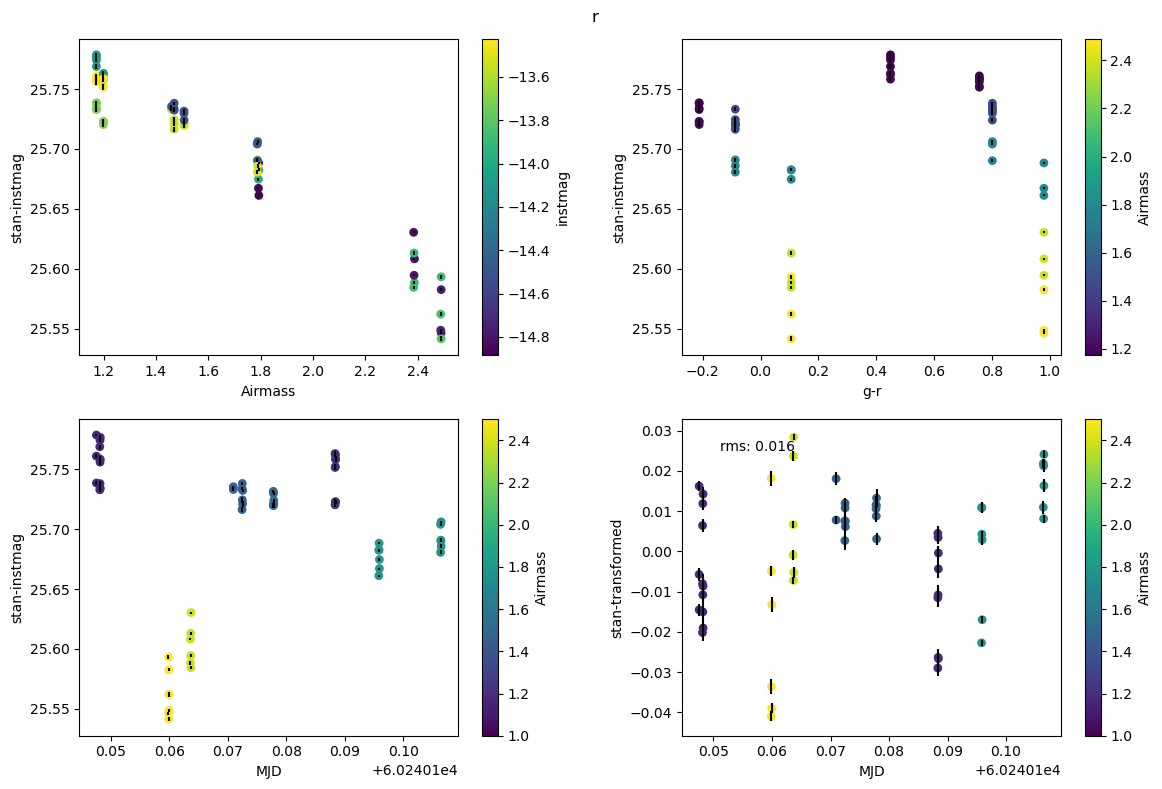

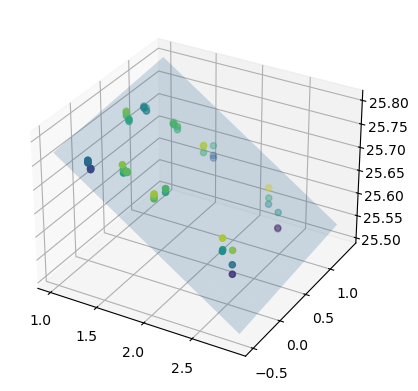

In [19]:
matplotlib.use('QT5Agg')
%matplotlib inline

for filt,filtname in zip(filts[2:3],filtnames[2:3]) :
    # get all table entries in this filter
    gd = np.where(tab_phot['FILTER'] == filtname)[0]

    # load up instrument magnitudes, uncertainties, airmass, color, mjd, and standard mag from table
    instmag = tab_phot['aper10'][gd]+2.5*np.log10(tab_phot['EXPTIME'][gd])
    instmag_err = tab_phot['aper10err'][gd]
    airmass = tab_phot['AIRMASS'][gd]
    mjd = tab_phot['MJD'][gd]
    color = tab_phot['g']-tab_phot['r']
    stan = tab_phot[filt][gd]

    # plot stan-mag vs airmass, color, and MJD
    fig,ax=plots.multi(2,2,figsize=(12,8))
    plots.plotc(ax[0,0],airmass,stan-instmag,instmag,yerr=instmag_err,
                cmap='viridis',xt='Airmass',yt='stan-instmag',colorbar=True,zt='instmag',size=40)
    plots.plotc(ax[0,1],color,stan-instmag,airmass,yerr=instmag_err,
                cmap='viridis',xt='g-r',yt='stan-instmag',colorbar=True,zt='Airmass',size=40)
    plots.plotc(ax[1,0],mjd,stan-instmag,airmass,yerr=instmag_err,
                cmap='viridis',zr=[1,2.5],xt='MJD',yt='stan-instmag',colorbar=True,zt='Airmass',size=40)

    # set up and do least squares fit
    design = np.array([airmass,color,np.ones(len(gd))]).T
    rhs = stan-instmag
    fit,resid,rank,s = np.linalg.lstsq(design,rhs.value.data)

    # use fit to calculate transformed mags, and plot stan-transformed vs MJD
    trans = instmag + fit[0]*airmass + fit[1]*color + fit[2]
    plots.plotc(ax[1,1],mjd,stan-trans, airmass,yerr=instmag_err,cmap='viridis', zr=[1,2.5],
                xt='MJD',yt='stan-transformed',zt='Airmass',size=40,colorbar=True)
    ax[1,1].text(0.1,0.9,'rms: {:.3f}'.format((stan-trans).std()),transform=ax[1,1].transAxes)
    
    fig.suptitle(filt)
    fig.tight_layout()

    # 3D plot of stan-instmag vs airmass and color, with best fit plane
    ax=plt.figure().add_subplot(projection='3d')
    ax.scatter(airmass,color,stan-instmag,marker='o',c=stan-trans,cmap='viridis')
    yy,xx=np.mgrid[-0.5:1.5:0.1,1:3:0.1]
    ax.plot_surface(xx,yy,fit[0]*xx+fit[1]*yy+fit[2],alpha=0.2)
    

<h2> Biases investigation </h2>

In [20]:
red.dir='/home/holtz/raw/apo/oct23/UT231102'
bias1=red.mkbias(range(1,16),display=t)
bias2=red.mkbias(range(47,62))
red.dir

  Reading file: /home/holtz/raw/apo/oct23/UT231102/bias4x4.0001.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231102/bias4x4.0002.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231102/bias4x4.0003.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231102/bias4x4.0004.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo/oct23/UT231102/bias4x4.0005.fits
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  subtracting overscan vector 
  Reading file: /home/holtz/raw/apo

ValueError: The Axes must have been created in the present figure

<Figure size 640x480 with 0 Axes>

In [58]:
%matplotlib qt
t.tv(bias1)
t.tv(bias2)

TypeError: tv() got an unexpected keyword argument 'display'